In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

### Data Load
- 'PL04496-03040' (prod_list[0]) 제품만을 대상으로
- 정상 데이터만으로 학습
- 전체 데이터로 테스트

In [2]:
isee_machine = pd.read_csv('./data/isee_machine_middle_NG_inter_MapNorm_combined_label.csv')
prod_list = isee_machine.ProductNum.unique()

# prod_list[0] 제품에 대해서만 분석
isee_machine = isee_machine[isee_machine.ProductNum == prod_list[0]]    

analy_col = ['CycleTime', 'VpPosition', 'VpTime',
        'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
        'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
        'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
        'Zone1', 'Zone2', 'Zone3', 'Zone4'] 
isee_machine['NG_Label'] = isee_machine['NG'] + isee_machine['NG5']

# combined_label== 1인것을 정상으로 편입, 하나씩 낮춰줌
isee_machine['combined_label'] = [x-1 if x>1 else x for x in isee_machine['combined_label']] 
# 원래 combined_label== 3,4,5 인 것을 위험군으로 합침
isee_machine['combined_label'] = [2 if x>=2 else x for x in isee_machine['combined_label']]

### combined_label 조정

In [3]:
idx_labeled4 = isee_machine[isee_machine['combined_label']>=1].index.tolist()

for n in [40]:
    proba = []

    for id in idx_labeled4:
        temp_df_before = isee_machine.loc[id-n:id-1].sort_index(ascending=True).reset_index(drop=True)
        temp_df_after = isee_machine.loc[id+10:id+n-1+10].sort_index(ascending=False).reset_index(drop=True)
        proba.append((temp_df_before['NG'] * temp_df_before.index/n).sum() + (temp_df_after['NG'] * temp_df_after.index/n).sum())
        #proba.append((temp_df_after['NG'] * temp_df_after.index/n).sum())


    prob_df = pd.concat([pd.DataFrame(idx_labeled4, columns=['idx']),pd.DataFrame(proba, columns=['proba'])],axis=1)
    id_list = prob_df[prob_df.proba == 0]['idx'].values
    print("정상추가갯수: ", isee_machine.loc[id_list].groupby('combined_label')['combined_label'].count())
    isee_machine.loc[id_list,'combined_label'] = isee_machine.loc[id_list,'combined_label'] -1
    #isee_machine.set_value(prob_df[prob_df.proba == 0]['idx'].values,'combined_label', 0)

isee_machine['combined_label'].mask(isee_machine['combined_label']< 0, 0, inplace=True)

idx_labeled0 = isee_machine[isee_machine['combined_label']< 5].index.tolist()

n = 40
proba = []

for id in idx_labeled0:
    #proba.append(isee_machine.loc[id:id+n-1]['NG'].sum())
    temp_df_before = isee_machine.loc[id-n:id-1].sort_index(ascending=True).reset_index(drop=True)
    temp_df_after = isee_machine.loc[id+10:id+n-1+10].sort_index(ascending=False).reset_index(drop=True)
    proba.append((temp_df_before['NG'] * temp_df_before.index/n).sum() + (temp_df_after['NG'] * temp_df_after.index/n).sum())
    #proba.append((temp_df_after['NG'] * temp_df_after.index/n).sum())

prob_df = pd.concat([pd.DataFrame(idx_labeled0, columns=['idx']),pd.DataFrame(proba, columns=['proba'])],axis=1)

print("평균:, ",prob_df.proba.mean(), "중앙값:, ",prob_df.proba.median(), " max: ",prob_df.proba.max())
print("전체 정상 갯수: ", len(prob_df[prob_df.proba == 0]['idx']))

div = (prob_df.proba.max() - prob_df.proba.median() * 4) / 3

t1 = prob_df.proba.max() - div * 3
t2 = prob_df.proba.max() - div * 2


#print(len(prob_df[(prob_df.proba > 0) & (prob_df.proba < 5)]['idx']))
print(len(prob_df[(t1 <= prob_df.proba) & (prob_df.proba < t2)]['idx']))
print(len(prob_df[t2 <= prob_df.proba]['idx']))

isee_machine.set_value(prob_df[prob_df.proba >= t1]['idx'].values,'combined_label', 1)
isee_machine.set_value(prob_df[prob_df.proba >= t2]['idx'].values,'combined_label', 2)

정상추가갯수:  combined_label
1    1743
2    1095
Name: combined_label, dtype: int64
평균:,  2.2918515180923333 중앙값:,  0.825  max:  28.65
전체 정상 갯수:  19147
10435
2152


C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,creationTime,ModuleCount,CycleTime,VpPosition,VpTime,VpPressure,MaxInjectionPressure,InjectionEndPosition,PlasticizingTime,PlasticsEndPosotion,...,NG5,ProductNum,K_mahala_label,mahala_label,lof_label,gmm_label,IF_label,svm_label,combined_label,NG_Label
0,2018-09-01 19:13:00,270172.0,42.120,25.0,4.9900,60.0,80.0,22.90,13.0900,97.200,...,0,PL04496-03040,0,0,1,1,1,1,1,0
1,2018-09-01 19:14:00,270173.5,42.110,25.0,5.0050,61.0,81.5,16.10,13.1500,97.250,...,0,PL04496-03040,0,0,0,1,0,1,0,0
2,2018-09-01 19:15:00,270175.0,42.110,25.0,4.9600,61.0,82.0,15.10,13.7300,97.200,...,0,PL04496-03040,0,0,0,1,0,1,0,0
3,2018-09-01 19:16:00,270176.0,42.110,25.0,4.9700,61.0,82.0,14.00,14.1600,97.100,...,0,PL04496-03040,0,0,0,1,0,1,0,0
4,2018-09-01 19:17:00,270177.5,42.110,25.0,4.9450,62.5,83.5,16.30,14.4100,97.150,...,0,PL04496-03040,0,0,0,1,0,1,0,0
5,2018-09-01 19:18:00,270179.0,42.110,25.0,4.7900,61.0,83.0,12.70,15.7500,96.800,...,0,PL04496-03040,0,0,0,1,1,1,0,0
6,2018-09-01 19:19:00,270180.5,42.105,25.0,4.9300,62.5,84.0,16.60,15.2900,97.050,...,0,PL04496-03040,0,0,0,1,0,1,0,0
7,2018-09-01 19:20:00,270182.0,42.100,25.0,4.8000,62.0,84.0,16.30,15.0100,96.900,...,0,PL04496-03040,0,0,0,1,0,1,0,0
8,2018-09-01 19:21:00,270183.5,42.100,25.0,4.8300,62.5,71.5,19.95,14.8800,96.900,...,0,PL04496-03040,0,0,0,1,1,1,0,0
9,2018-09-01 19:22:00,270185.0,42.100,25.0,4.9000,61.0,84.0,16.10,14.1100,97.100,...,0,PL04496-03040,0,0,0,1,0,1,0,0


### Scaler

In [4]:
from sklearn.preprocessing import RobustScaler

In [5]:
# Initialize a scaler using the training data.
isee_machine[analy_col] = RobustScaler().fit_transform(isee_machine[analy_col])

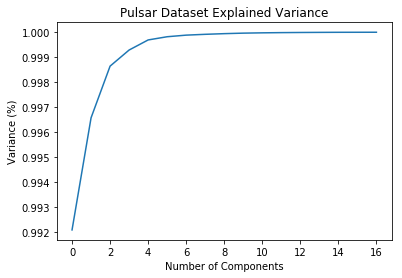

In [6]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(isee_machine[analy_col])
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

### PCA

In [7]:
pca = PCA(n_components=3)
X = pca.fit_transform(isee_machine[analy_col])
isee_machine = pd.concat([isee_machine[['CycleNum','combined_label']],pd.DataFrame(X)], axis=1)
print(pca.explained_variance_ratio_.sum()) 

0.9986437749556698


In [13]:
(df.loc[s*i:s*i+w-1]['combined_label']**2).sum()

1

In [18]:
w=60    # window size
s=10     # stride
n= 30    # 몇분 후랑 복원율 비교?

label = []
labelf = []


for c in isee_machine['CycleNum'].unique():
    df = isee_machine[isee_machine['CycleNum']==c]
    df = df.reset_index(drop=True)
    for i in range(int((len(df)-w)/s - n)):
        df.loc[s*i:s*i+w-1][0].plot(c='r')
        df.loc[s*i:s*i+w-1][1].plot(c='g')
        df.loc[s*i:s*i+w-1][2].plot(c='b')
        plt.gca().axes.get_xaxis().set_visible(False)
        #plt.axis('off')        
        temp = (df.loc[s*i:s*i+w-1]['combined_label'] ** 2).mean()
        label.append(temp)        
        plt.savefig('./image/'+str(c)+'-'+str(i)+'p '+ str(temp) +'.png')
        plt.clf()

        df.loc[s*i+n:s*i+w-1+n][0].plot(c='r')
        df.loc[s*i+n:s*i+w-1+n][1].plot(c='g')
        df.loc[s*i+n:s*i+w-1+n][2].plot(c='b')
        plt.gca().axes.get_xaxis().set_visible(False)
        #plt.axis('off')
        temp = (df.loc[s*i+n:s*i+w-1+n]['combined_label'] ** 2).mean()
        labelf.append(temp)
        plt.savefig('./image/'+str(c)+'-'+str(i)+'f ' +  str(temp) +'.png')
        plt.clf()

print("저장 완료!!")

<Figure size 432x288 with 0 Axes>

In [ ]:
isee_machine.loc[0:60-1][0].plot(c='r')
isee_machine.loc[0:60-1][1].plot(c='g')
isee_machine.loc[0:60-1][2].plot(c='b')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()
#plt.savefig('./image/'+'0')
plt.clf()

isee_machine.loc[60:120-1][0].plot(c='r')
isee_machine.loc[60:120-1][1].plot(c='g')
isee_machine.loc[60:120-1][2].plot(c='b')
plt.show()
#plt.savefig('./image/'+'0')
plt.clf()